## PE 262 Computer Programming  in Oil and Gas


### Lecture 5: Symbolic Computation (Sympy)    


**Dr. Y.A. Sokama-Neuyam/ Dr. C.D. Adenutsi/ Dr. J.A. Quaye**  
Department of Petroleum Engineering  
College of Engineering  
KNUST, Kumasi, Ghana.  

## 5.0 Introduction

- In this lecture, we shall introduce some basic functionality of the SymPy (SYMbolic Python) library. In contrast to numerical computation (involving numbers), in symbolic calculation we are processing and transforming generic variables.

- Symbolic calculation is very slow compared to floating point operation, and thus generally not for direct simulation. 

- However, it is a powerful tool to support the preparation of code and symbolic work. Occasionally, we use symbolic operations in simulations to work out the most efficient numerical code, before that is executed.

- Before we start using sympy, we'll call init_printing. This tells sympy to display expressions in a nicer format.

In [1]:
import sympy
sympy.init_printing(use_latex='mathjax')

## Symbols
Before we can carry out any symbolic operations, we need to create symbolic variables using SymPy’s Symbol function:

In [34]:
from sympy import Symbol
x = Symbol('x')
type(x)

sympy.core.symbol.Symbol

In [37]:
y = Symbol('y')
2 * x - x
x + y + x + 10*y
y + x - y + 10

x + 10

- We can abbreviate the creation of multiple symbolic variables using the symbols function. For example, to create the symbolic variables x, y and z, we can use.

- Once we have completed our term manipulation, we sometimes like to insert numbers for variables. This can be done using the subs method.

In [38]:
import sympy
x, y, z = sympy.symbols('x,y,z')
x + 2*y + 3*z - x

2⋅y + 3⋅z

In [5]:
from sympy import symbols
x, y = symbols('x,y')
x + 2*y
x + 2*y.subs(x, 10)
(x + 2*y).subs(x, 10)
(x + 2*y).subs(x, 10).subs(y, 3)

16

We can also substitute a symbolic variable for another one such as in this example where `y` is replaced with `x` before we substitute `x` with the number `2`.

In [40]:
myterm = 3*x + y**2
myterm
myterm.subs(x, y)
myterm.subs(x, y).subs(y, 2)

10

## 5.1 Differentiation

- We can use SymPy to carry out differentiation of many functions.
- The diff() function is used for differentiation
- Lets look at some examples

In [41]:
from sympy import Symbol, exp, sin, sqrt, diff
x = Symbol('x')
y = Symbol('y')
diff(sin(x), x)

cos(x)

In [44]:
diff(sin(x), y)
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x)
diff(10 + 3*x + 4*y + 10*x**2 + x**9, y)

4

In [45]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x).subs(x,1)
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x).subs(x,1.5)
diff(exp(x), x)
diff(exp(-x ** 2 / 2), x)

      2 
    -x  
    ────
     2  
-x⋅ℯ    

The SymPy diff() function takes a minimum of two arguments:

- the function to be differentiated and 
- the variable with respect to which the differentiation is performed. 

Higher derivatives may be calculated by specifying additional variables, or by adding an optional integer argument:

In [51]:
diff(3*x**4, x)
diff(3*x**4, x, x, x)
diff(3*x**4, x, 3)
#diff(3*x**4*y**7, x, 2, y, 2)
#diff(diff(3*x**4*y**7, x, x), y, y)

72⋅x

- At times, SymPy may return a result in an unfamiliar form. If, for example, you wish to use SymPy to check that you differentiated something correctly, a technique that might be of use is to subtract the SymPy result from your result, and check that the answer is zero.

- Taking the simple example of a multiquadric radial basis function, $\phi(r)=\sqrt{r^2+\sigma^2}$ with $r=\sqrt{x^2+y^2}$ and *σ* a constant, we can verify that the first derivative in *x* is $\partial\phi/\partial x=x/\sqrt{r^2+\sigma^2}$.

In this example, we first ask SymPy to print the derivative. See that it is printed in a different form to our trial derivative, but the subtraction verifies that they are identical:

In [52]:
r = sqrt(x**2 + y**2)
sigma = Symbol('σ')
def phi(x,y,sigma):
    return sqrt(x**2 + y**2 + sigma**2)

mydfdx= x / sqrt(r**2 + sigma**2)
print(diff(phi(x, y, sigma), x))
print(mydfdx - diff(phi(x, y, sigma), x))

x/sqrt(x**2 + y**2 + σ**2)
0


## 5.2 Integration
- Integration uses a similar syntax. 
- For the indefinite case, specify the function and the variable with respect to which the integration is performed:
- The integrate() function is used for integration

In [53]:
from sympy import integrate
integrate(x**2, x)
integrate(x**2, y)
integrate(sin(x), y)
integrate(sin(x), x)
integrate(-x*exp(-x**2/2), x)

   2 
 -x  
 ────
  2  
ℯ    

- We can calculate definite integrals by providing `integrate()` with a tuple containing the variable of interest, the lower and the upper bounds. 
- If several variables are specified, multiple integration is performed. 
- When SymPy returns a result in the `Rational` class, it is possible to evaluate it to a floating-point representation at any desired precision.

In [54]:
integrate(x*2, (x, 0, 1))
integrate(x**2, x)
integrate(x**2, x, x)
integrate(x**2, x, x, y)

 4  
x ⋅y
────
 12 

In [55]:
integrate(x**2, (x, 0, 2))
integrate(x**2, (x, 0, 2), (x, 0, 2), (y, 0, 1))
float(integrate(x**2, (x, 0, 2)))
type(integrate(x**2, (x, 0, 2)))
result_rational=integrate(x**2, (x, 0, 2))
result_rational.evalf()
result_rational.evalf(50)

2.6666666666666666666666666666666666666666666666667

## 5.3 Ordinary Differential Equations (ODE)
SymPy has inbuilt support for solving several kinds of ordinary differential equation via its dsolve command.

- We need to set up the ODE and pass it as the first argument, eq. 
- The second argument is the function f(x) to solve for. 
- An optional third argument, hint, influences the method that dsolve uses: some methods are better-suited to certain classes of ODEs, or will express the solution more simply, than others.

To set up the ODE solver, we need a way to refer to the unknown function for which we are solving, as well as its derivatives. The Function and Derivative classes facilitate this:

In [56]:
from sympy import Symbol, dsolve, Function, Derivative, Eq
y = Function("y")
x = Symbol('x')
y_ = Derivative(y(x), x)
dsolve(y_ + 5*y(x), y(x))

           -5⋅x
y(x) = C₁⋅ℯ    

- `dsolve` will introduce as many constants as are required, and they will all be named `Cn`, where `n` is an integer. 
- Note also that the first argument to `dsolve` is taken to be equal to zero unless we use the `Eq()` function to specify otherwise:

In [57]:
dsolve(y_ + 5*y(x), y(x))

dsolve(Eq(y_ + 5*y(x), 0), y(x))

dsolve(Eq(y_ + 5*y(x), 12), y(x))

           -5⋅x   12
y(x) = C₁⋅ℯ     + ──
                  5 

- At times, `dsolve` may return too general a solution. 
- One example is when there is a possibility that some coefficients may be complex. 
- If we know that, for example, they are always real and positive, we can provide `dsolve` this information to avoid the solution becoming unnecessarily complicated:

In [58]:
from sympy import *
a, x = symbols('a,x')
f = Function('f')
dsolve(Derivative(f(x), x, 2) + a**4*f(x), f(x))

               2            2  
           -ⅈ⋅a ⋅x       ⅈ⋅a ⋅x
f(x) = C₁⋅ℯ        + C₂⋅ℯ      

In [59]:
a = Symbol('a',real=True,positive=True)
dsolve(Derivative(f(x), x, 2)+a**4*f(x), f(x))

             ⎛ 2  ⎞         ⎛ 2  ⎞
f(x) = C₁⋅sin⎝a ⋅x⎠ + C₂⋅cos⎝a ⋅x⎠

## 5.4 Series Expansion and Plotting
- It is possible to expand many SymPy expressions as Taylor series. The `series` method makes this straightforward. 
- At minimum, we must specify the expression and the variable in which to expand it. 
- Optionally, we can also specify the point around which to expand, the maximum term number, and the direction of the expansion.

In [60]:
from sympy import *
x = Symbol('x')
sin(x).series(x, 0)

     3     5        
    x     x     ⎛ 6⎞
x - ── + ─── + O⎝x ⎠
    6    120        

In [61]:
series(sin(x), x, 0)

     3     5        
    x     x     ⎛ 6⎞
x - ── + ─── + O⎝x ⎠
    6    120        

In [62]:
cos(x).series(x, 0.5, 10)

                                              2                               
1.11729533119247 - 0.438791280945186⋅(x - 0.5)  + 0.0799042564340338⋅(x - 0.5)

3                               4                                5            
  + 0.0365659400787655⋅(x - 0.5)  - 0.00399521282170169⋅(x - 0.5)  - 0.0012188

                    6                                7                        
6466929218⋅(x - 0.5)  + 9.51241148024212e-5⋅(x - 0.5)  + 2.17654405230747e-5⋅(

        8                                9                          ⎛         
x - 0.5)  - 1.32116826114474e-6⋅(x - 0.5)  - 0.479425538604203⋅x + O⎝(x - 0.5)

10         ⎞
  ; x → 0.5⎠

In [63]:
cos(x).series(x, 0.5, 10).removeO()

                                                    9                         
-0.479425538604203⋅x - 1.32116826114474e-6⋅(x - 0.5)  + 2.17654405230747e-5⋅(x

       8                                7                                6    
 - 0.5)  + 9.51241148024212e-5⋅(x - 0.5)  - 0.00121886466929218⋅(x - 0.5)  - 0

                            5                               4                 
.00399521282170169⋅(x - 0.5)  + 0.0365659400787655⋅(x - 0.5)  + 0.079904256434

              3                              2                   
0338⋅(x - 0.5)  - 0.438791280945186⋅(x - 0.5)  + 1.11729533119247

- SymPy provides two inbuilt plotting functions, `Plot()` from the `sympy.plotting` module, and `plot` from `sympy.mpmath.visualization`. 

In [64]:
from sympy import sin,series,Symbol
import pylab
x = Symbol('x')
s10 = sin(x).series(x,0,10).removeO()
s20 = sin(x).series(x,0,20).removeO()
s = sin(x)
xx = []
y10 = []
y20 = []
y = []
for i in range(1000):
  xx.append(i / 100.0)
  y10.append(float(s10.subs({x:i/100.0})))
  y20.append(float(s20.subs({x:i/100.0})))
  y.append(float(s.subs({x:i/100.0})))

pylab.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

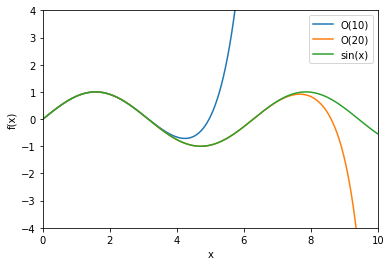

In [65]:
pylab.plot(xx, y10, label='O(10)')
pylab.plot(xx, y20, label='O(20)')
pylab.plot(xx, y, label='sin(x)')

pylab.axis([0, 10, -4, 4])
pylab.xlabel('x')
pylab.ylabel('f(x)')

pylab.legend()

## 5.5 Linear equations and matrix inversion

SymPy has a `Matrix` class and associated functions that allow the symbolic solution of systems of linear equations (and, of course, we can obtain numerical answers with `subs()` and `evalf()`). 

In [66]:
from sympy import symbols,Matrix
x, y, z = symbols('x,y,z')
A = Matrix(([3, 7], [4, -2]))
A

⎡3  7 ⎤
⎢     ⎥
⎣4  -2⎦

In [67]:
A.inv()

⎡1/17  7/34 ⎤
⎢           ⎥
⎣2/17  -3/34⎦

In [68]:
b = Matrix(( 12*z,5*z  ))
b

⎡12⋅z⎤
⎢    ⎥
⎣5⋅z ⎦

In [69]:
x = A.inv()*b
x

⎡59⋅z⎤
⎢────⎥
⎢ 34 ⎥
⎢    ⎥
⎢33⋅z⎥
⎢────⎥
⎣ 34 ⎦

In [70]:
x.subs({z:3.3}).evalf(4)

⎡5.726⎤
⎢     ⎥
⎣3.203⎦

An alternative method of solving the same problem is to construct the system as a matrix in augmented form; that is the form obtained by appending the columns of *A* and $\vec{b}$ together. The augmented matrix is[1]:

$$(A|\vec{b})=\left(\begin{array}{cc|c}
3 & 7 & 12z\\
4 & -2 & 5z\end{array} \right),$$

 and as before we construct this as a SymPy `Matrix` object, but in this case we pass it to the `solve_linear_system()` function:

In [71]:
from sympy import Matrix, symbols, solve_linear_system
x, y, z = symbols('x,y,z')
system = Matrix(([3, 7, 12*z],[4, -2, 5*z]))
system

⎡3  7   12⋅z⎤
⎢           ⎥
⎣4  -2  5⋅z ⎦

In [72]:
sol = solve_linear_system(system,x,y)
sol

⎧   59⋅z     33⋅z⎫
⎨x: ────, y: ────⎬
⎩    34       34 ⎭

A third option is the `solve()` method, whose arguments include the individual symbolic equations, rather than any matrices. Like `dsolve()`, `solve()` expects either expressions which it will assume equal to zero, or `Equality` objects, which we can conveniently create with `Eq()`:

In [73]:
from sympy import symbols,solve,Eq
x, y, z = symbols('x,y,z')
solve((Eq(3*x+7*y,12*z), Eq(4*x-2*y,5*z)), x, y)

⎧   59⋅z     33⋅z⎫
⎨x: ────, y: ────⎬
⎩    34       34 ⎭

In [74]:
solve((3*x+7*y-12*z, 4*x-2*y-5*z), x, y)

⎧   59⋅z     33⋅z⎫
⎨x: ────, y: ────⎬
⎩    34       34 ⎭